In [67]:
from __future__ import unicode_literals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv", encoding='latin-1')

# Regex taken from
# https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression/8377440#8377440
def clean_tweet(tweet):
        return (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())).lower()
    
tweets_csv['text'] = tweets_csv['text'].astype('unicode').apply(clean_tweet)
tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
word_count = dict()

# Clean and tokenize the plots, then count the appearance of each word in the tweets
for index, tweet in tweets.iteritems():
    #words = nltk.word_tokenize(clean_tweet(str(tweet).lower()))
    words = nltk.word_tokenize(str(tweet))
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

In [54]:
import datetime

# For purposes of filling in all dates with 0 for tweet count below, find the dates of the earliest and the latest tweets
earliest_tweet = datetime.date(2017, 1, 1)
latest_tweet = datetime.date(2016, 12, 31)

for index, date in tweets_csv["created_str"].iteritems():
    sdate = str(date)[0:10].split('-')
    if sdate[0] != 'nan' and sdate[1] != 'nan' and sdate[2] != 'nan':
        date = datetime.date(int(sdate[0]), int(sdate[1]), int(sdate[2]))
        if date < earliest_tweet:
            earliest_tweet = date
        if date > latest_tweet:
            latest_tweet = date
        
print("Earliest tweet tweeted on: " + str(earliest_tweet))
print("Latest tweet tweeted on: " + str(latest_tweet))

Earliest tweet tweeted on: 2014-07-14
Latest tweet tweeted on: 2017-09-26


In [55]:
# filter for strings containing 3 or more characters which have been mentioned at least 100 times
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

# To view the counts for each word, uncomment the next 2 lines

#for key, count in sorted_count:
    #print(key + " " + str(count))

trump 28535
n't 13936
clinton 11949
hillary 11199
amp 9835
obama 9116
people 6658
â¦ 5972
... 5468
like 5447
new 5279
get 4904
donald 4876
one 4691
news 4611
via 4253
politics 4222
tcot 3876
america 3743
https 3582
president 3500
would 3392
're 3310
black 3300
time 3214
know 3196
make 3118
says 3087
day 3081
vote 3055
want 3022
never 2872
love 2824
pjnet 2823
election 2764
maga 2728
think 2700
media 2687
right 2642
white 2613
good 2605
see 2529
video 2524
campaign 2523
need 2521
say 2421
man 2399
gop 2387
let 2361
world 2356
back 2294
american 2247
going 2178
today 2130
great 2084
got 2075
take 2055
stop 2048
watch 2030
still 2006
first 1993
could 1976
life 1974
women 1932
really 1903
police 1891
country 1875
/â¦ 1862
said 1827
every 1825
bill 1766
even 1738
support 1695
'll 1687
show 1680
house 1656
way 1641
years 1639
real 1632
httpsâ¦ 1625
post 1613
much 1609
god 1602
ccot 1597
httpâ¦ 1576
state 1566
look 1560
isis 1559
best 1537
live 1502
ever 1496
last 1481
debate 1473
must 14

{'democrats': 1254, 'maga': 2728, 'gop': 2387, 'obama': 9116, 'trump': 28535, 'muslim': 1376, 'donald': 4876, 'hillary': 11199, 'campaign': 2523, 'election': 2764, 'world': 2356, 'news': 4611, 'dnc': 1382, 'isis': 1559, 'america': 3743, 'clinton': 11949, 'american': 2247, 'white': 2613, 'clinton_combined': 23148, 'black': 3300, 'trump_combined': 33411, 'president': 3500, 'politics': 4222}


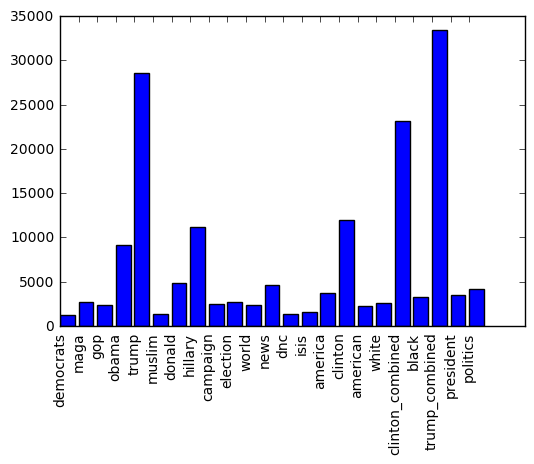

In [56]:
# Based on word counts, we chose these words to analyze below
selected = {
    'trump' : filtered_count["trump"],
    'clinton' : filtered_count["clinton"],
    'hillary' : filtered_count["hillary"],
    'obama': filtered_count["obama"],
    'donald': filtered_count["donald"],
    'politics': filtered_count["politics"],
    'news': filtered_count["news"],
    'america': filtered_count["america"],
    'president': filtered_count["president"],
    'black': filtered_count["black"],
    'election': filtered_count["election"],
    'gop': filtered_count["gop"],
    'maga': filtered_count["maga"],
    'campaign': filtered_count["campaign"],
    'world': filtered_count["world"],
    'white': filtered_count["white"],
    'american': filtered_count["american"],
    'dnc': filtered_count["dnc"],
    'muslim': filtered_count["muslim"],
    'democrats': filtered_count["democrats"],
    'isis': filtered_count["isis"],
    'clinton_combined':filtered_count["hillary"] + filtered_count["clinton"],
    'trump_combined': filtered_count["trump"] + filtered_count["donald"]
}

print(selected)

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

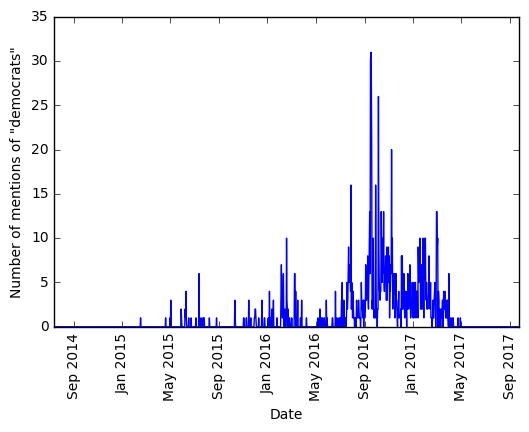

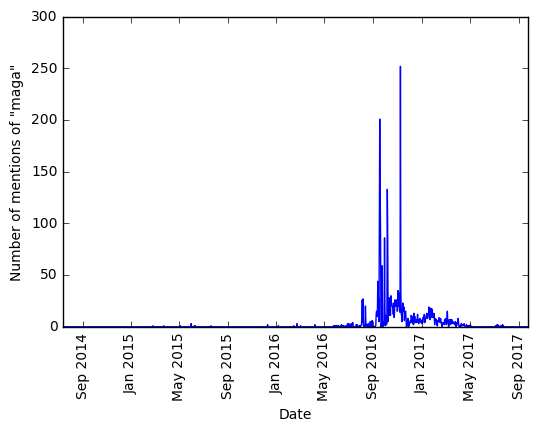

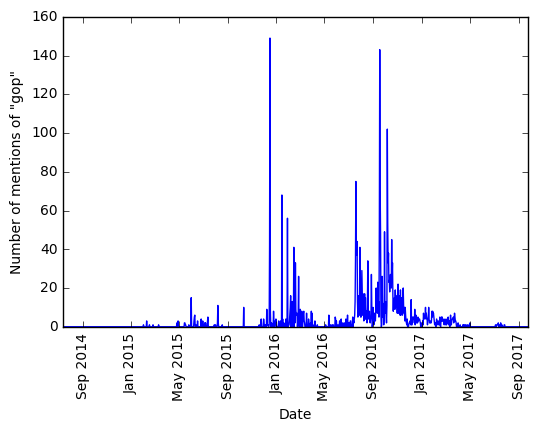

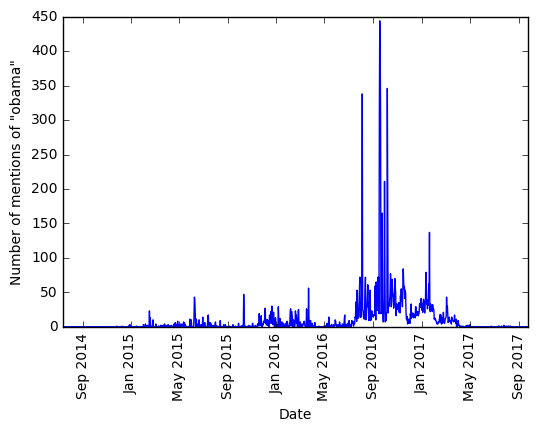

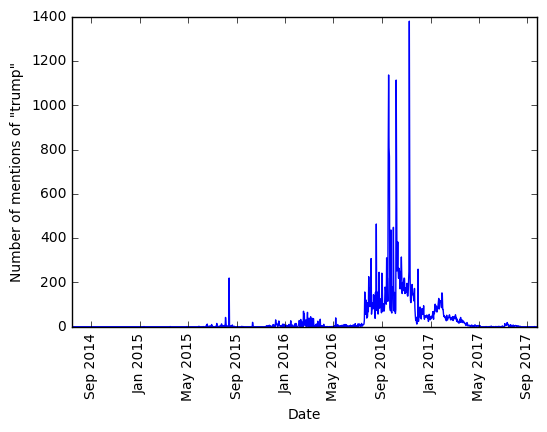

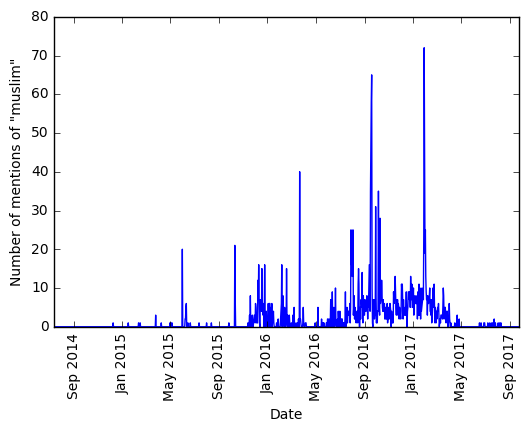

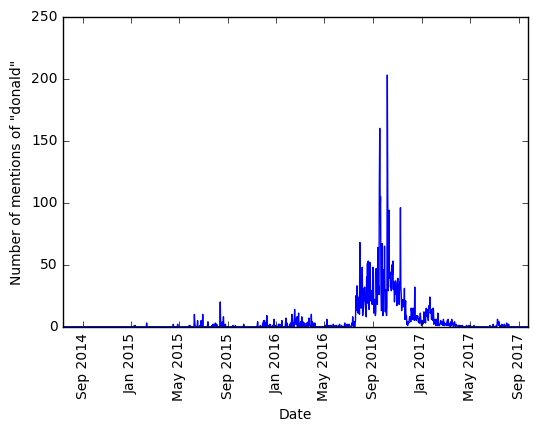

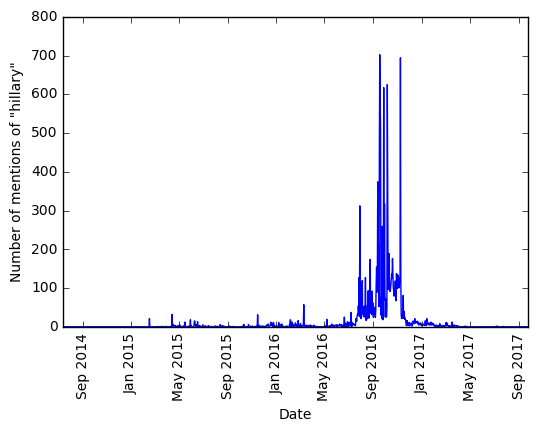

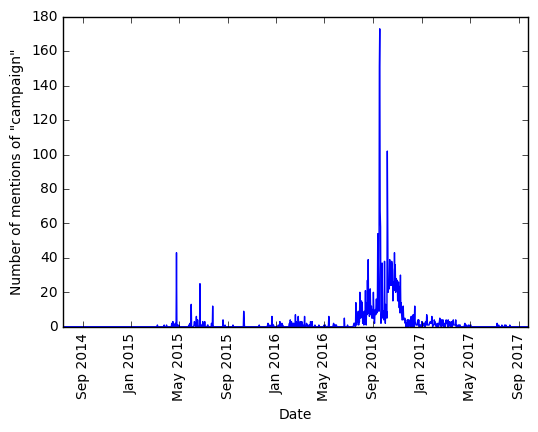

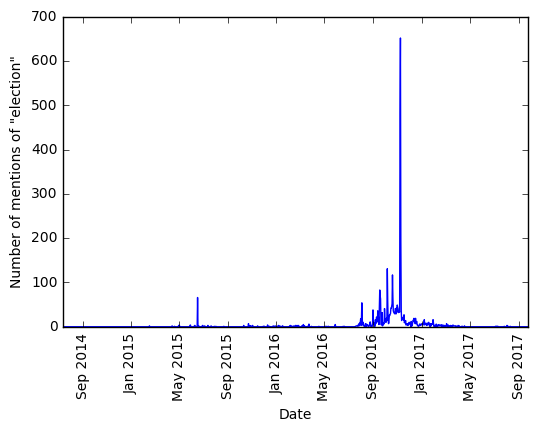

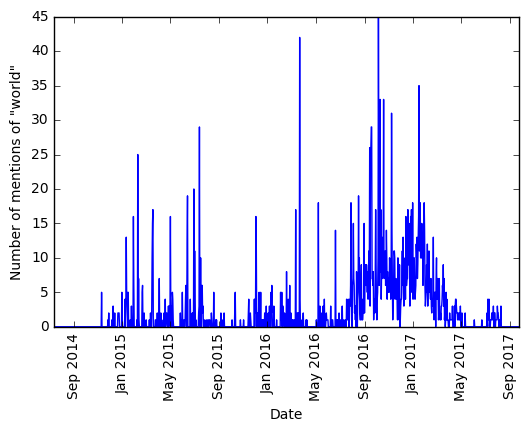

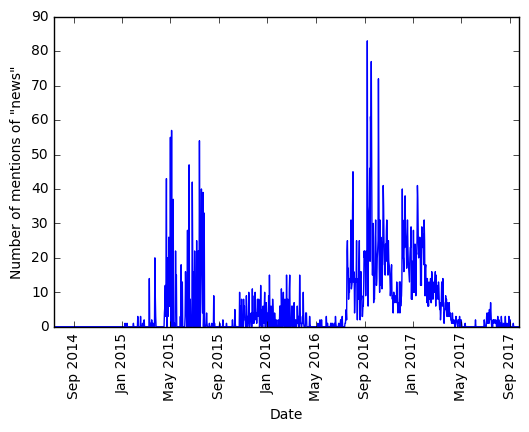

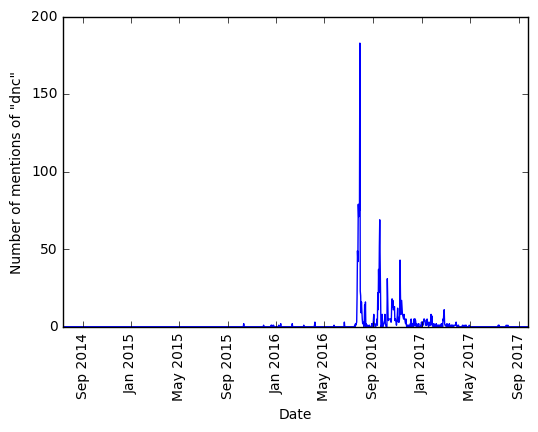

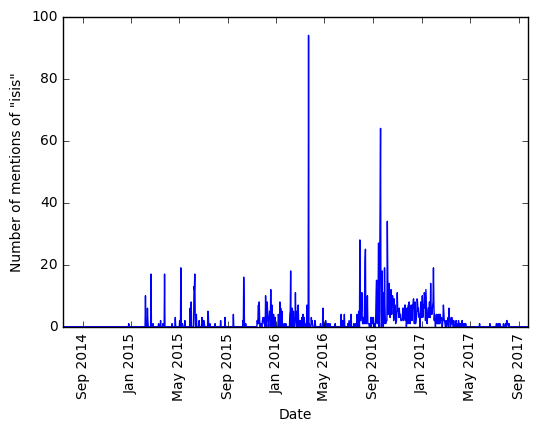

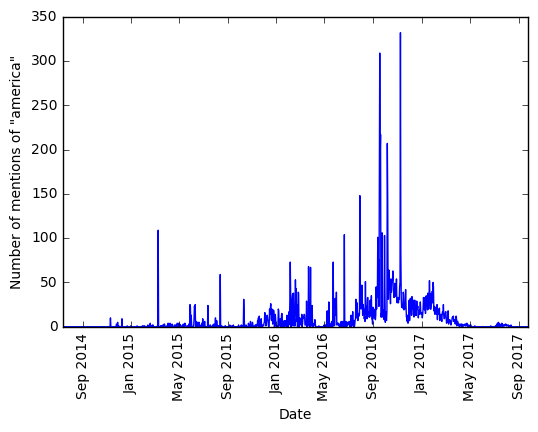

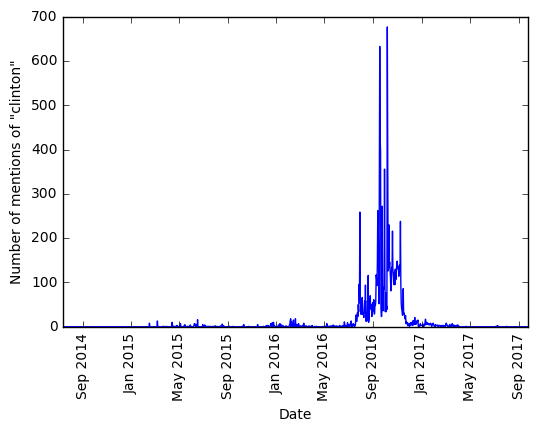

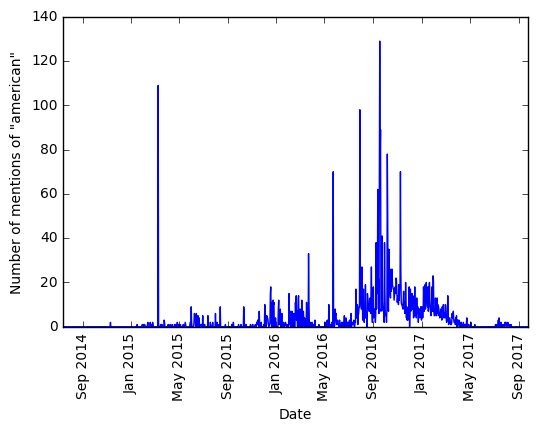

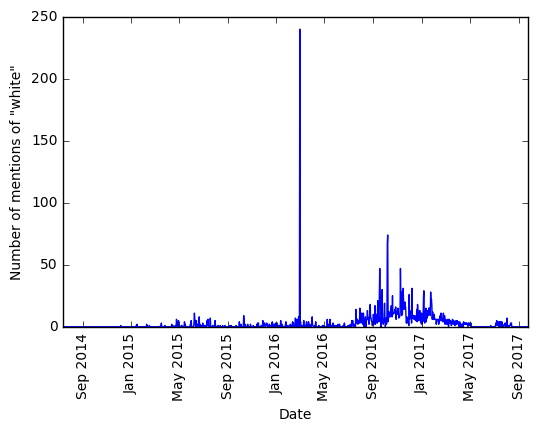

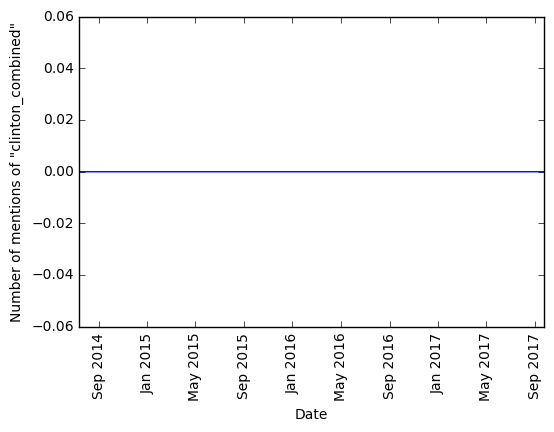

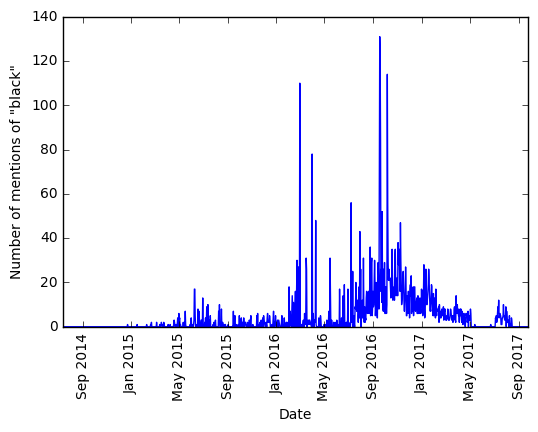

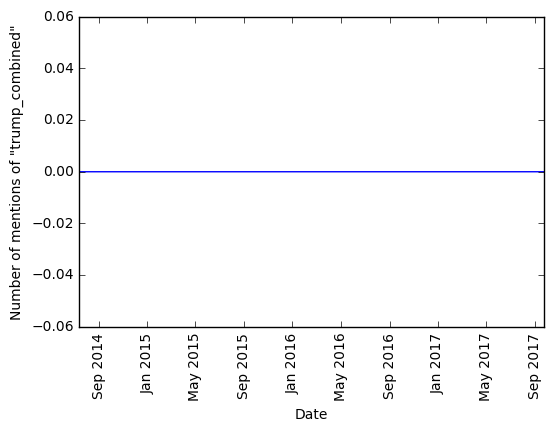

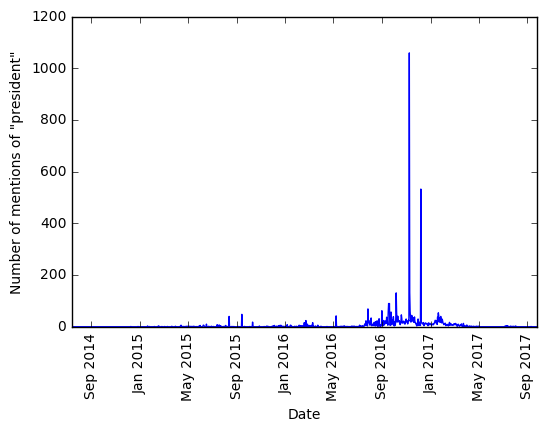

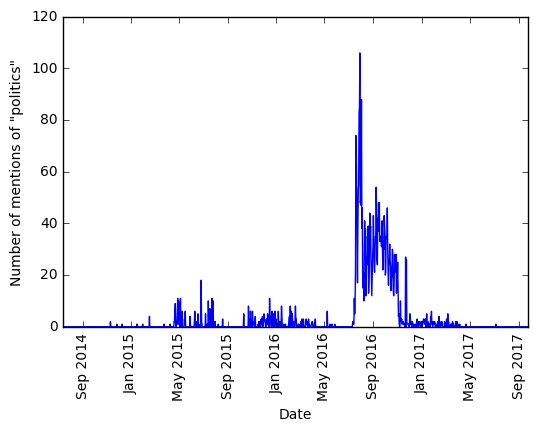

In [57]:
import datetime

# Return the number of times a word appeared in a tweet on a given day, with the returned list sorted by date
def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()
    
    for day in range(int((latest_tweet - earliest_tweet).days)):
        dateCount[earliest_tweet + datetime.timedelta(day)] = 0

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 1
        
    orderedTweetCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderedTweetCount

def PlotMentions(tweets, word, dateRange = None):
    x_val = [x[0] for x in tweets]
    y_val = [x[1] for x in tweets]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    
    if (dateRange != None):
        plt.xlim(dateRange[0], dateRange[1])
        
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

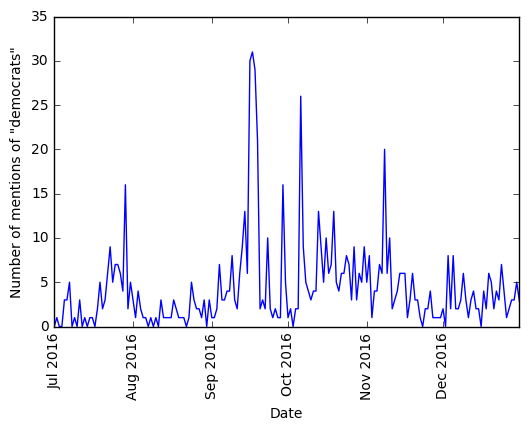

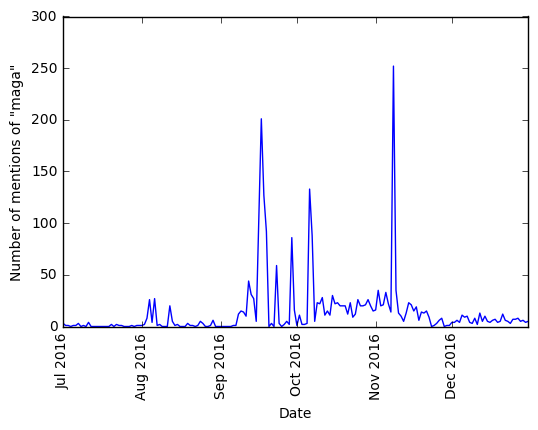

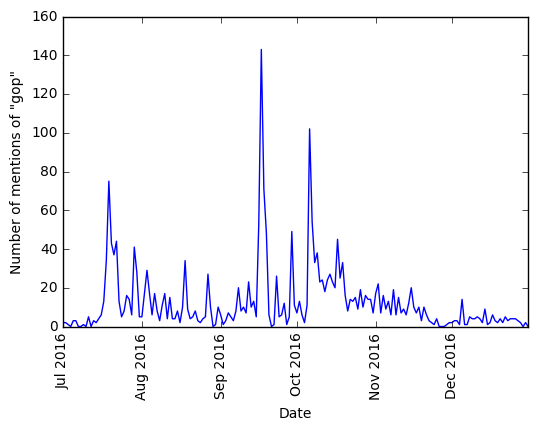

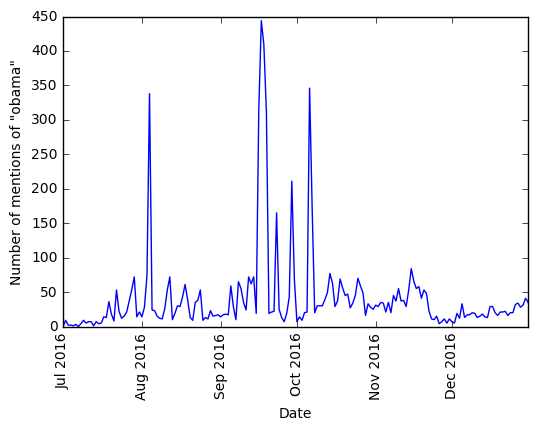

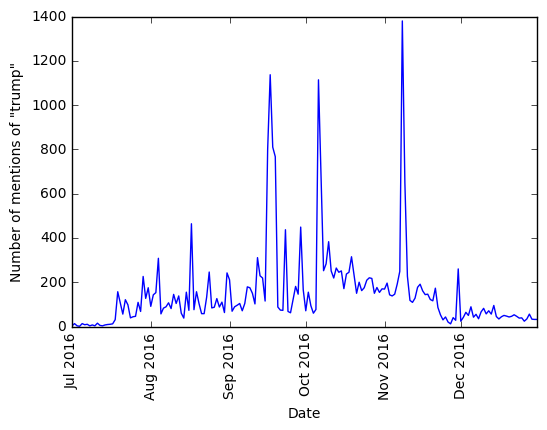

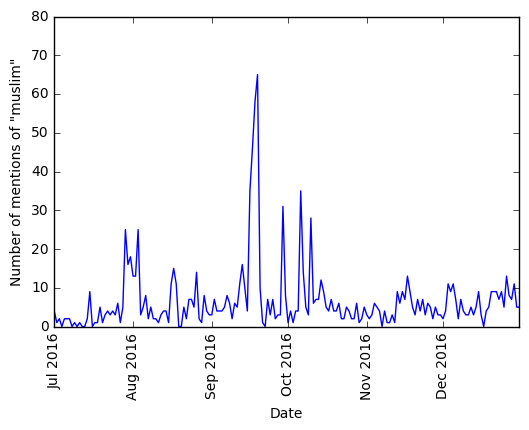

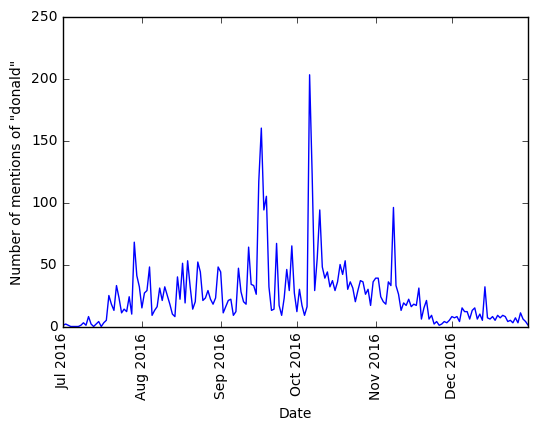

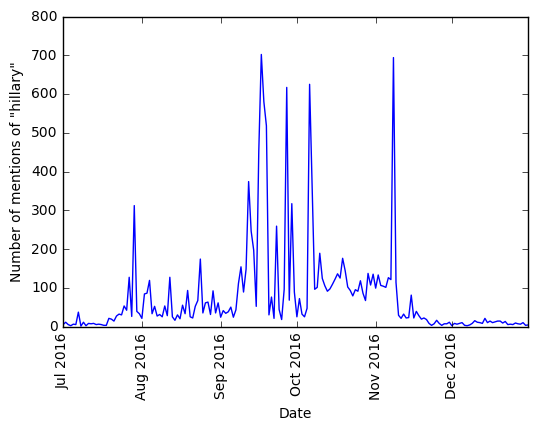

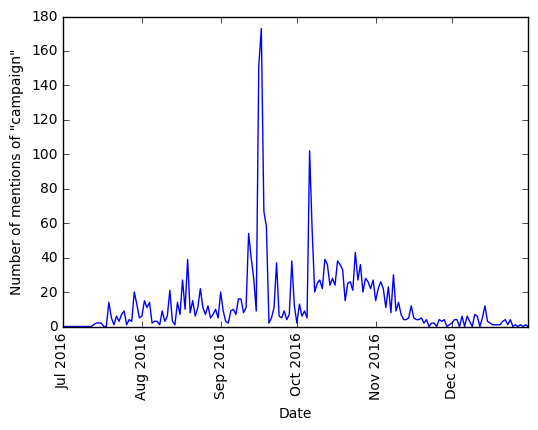

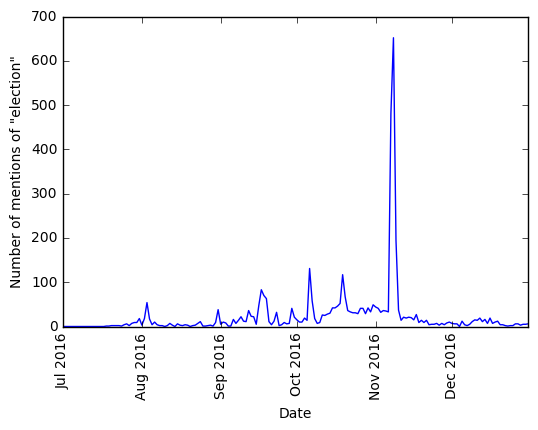

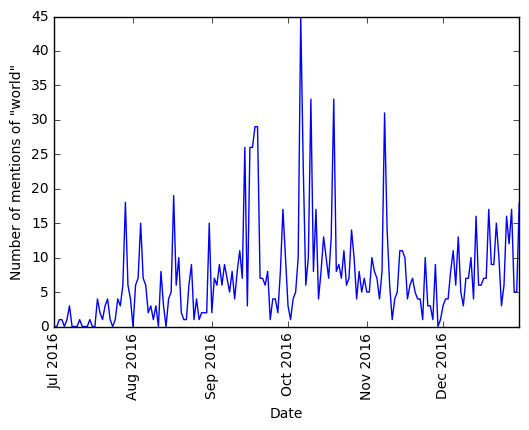

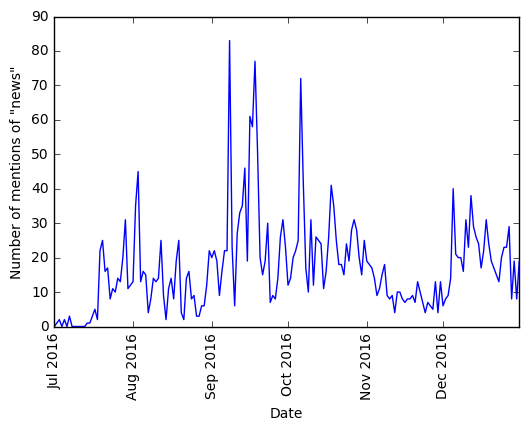

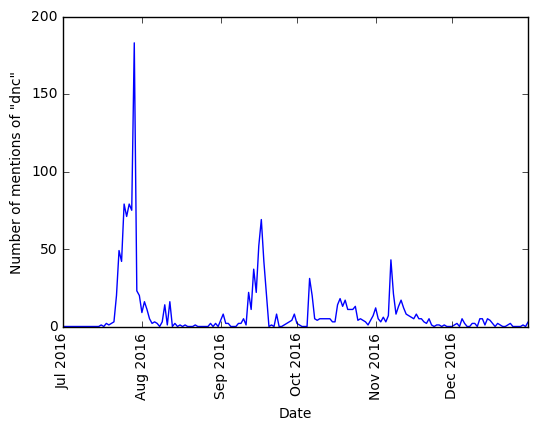

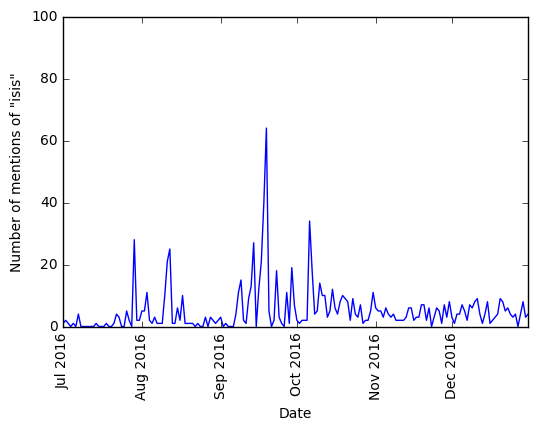

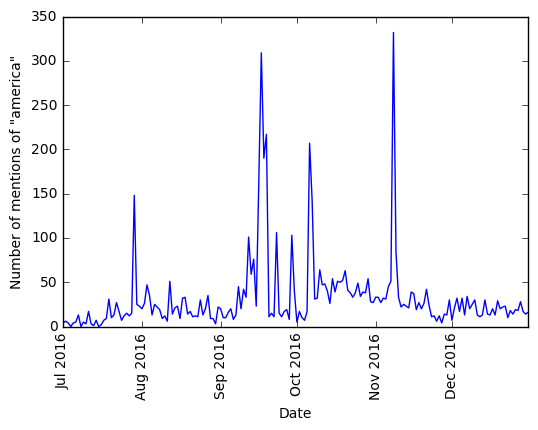

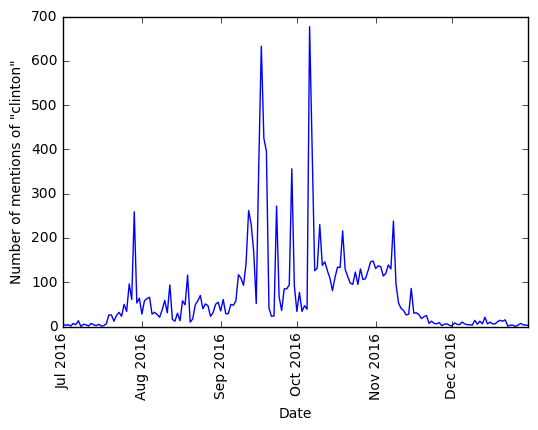

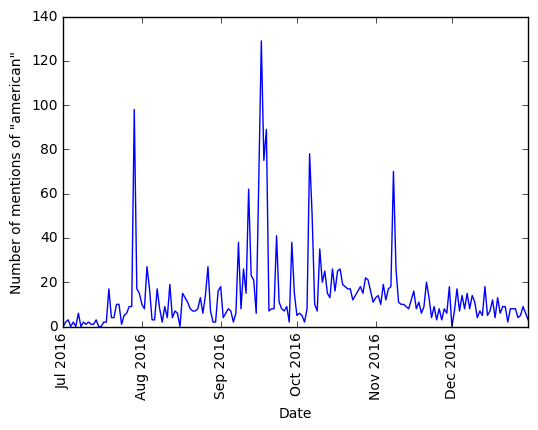

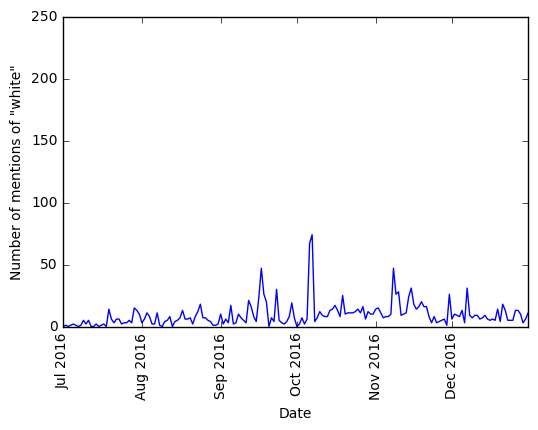

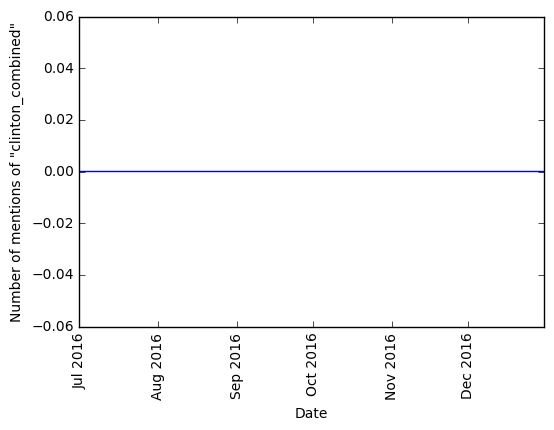

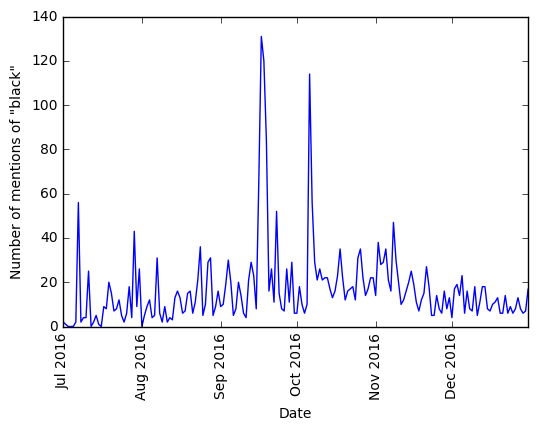

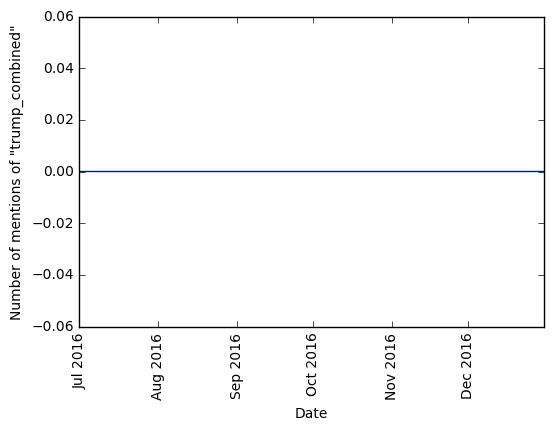

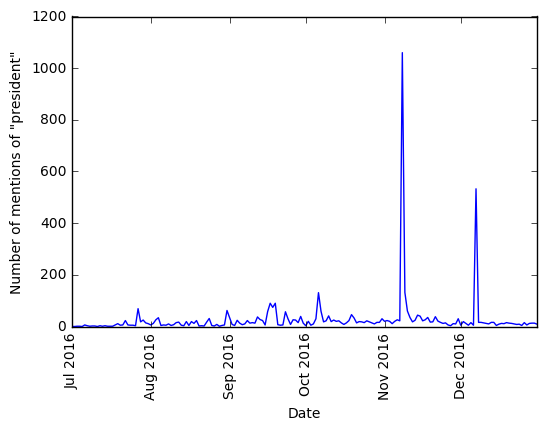

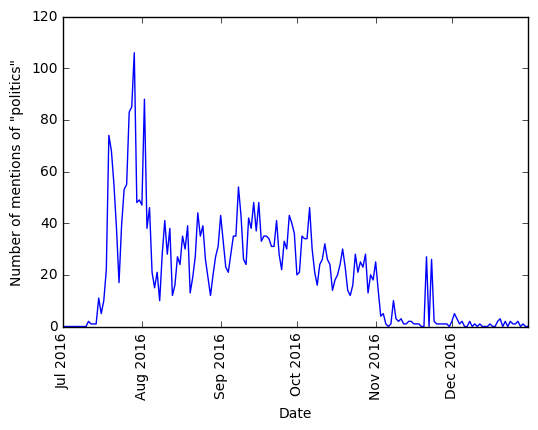

In [58]:
# Does the same as above, but looking at the election season
July1 = datetime.date(2016, 7, 1)
December31 = datetime.date(2016, 12, 31)

for word in selected.keys():
    PlotMentions(GetDates(word), word, (July1, December31))

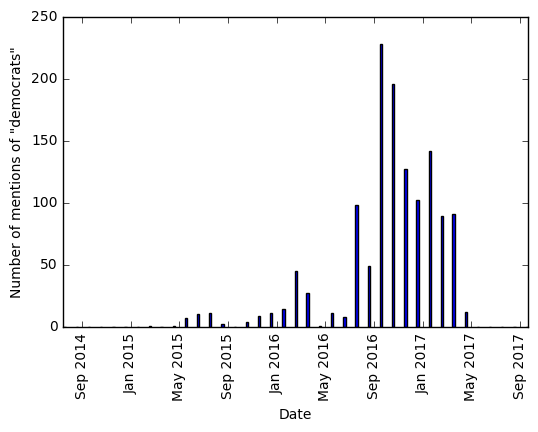

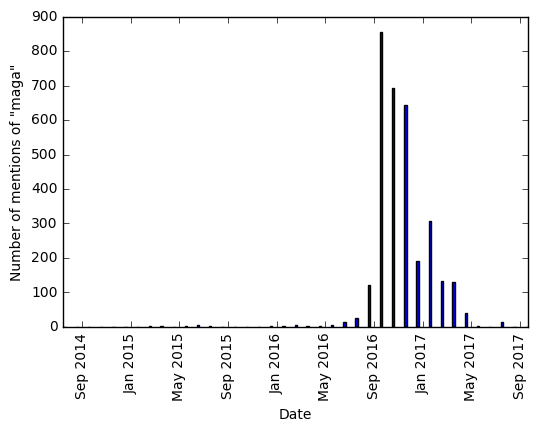

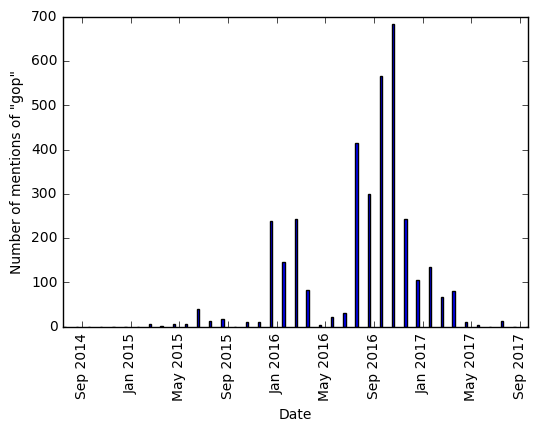

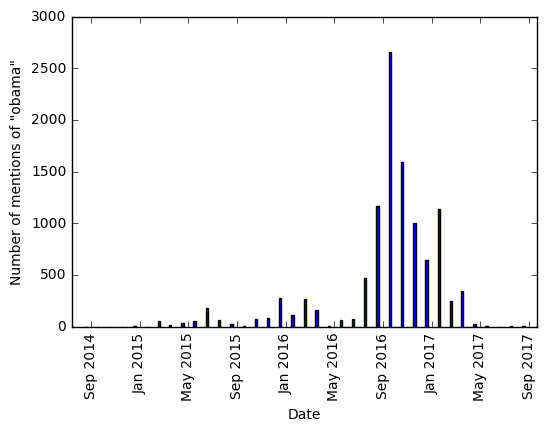

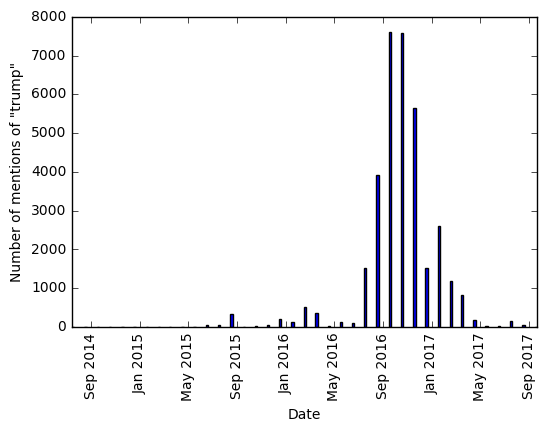

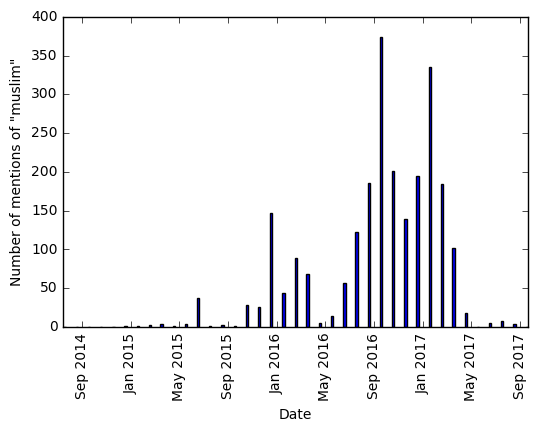

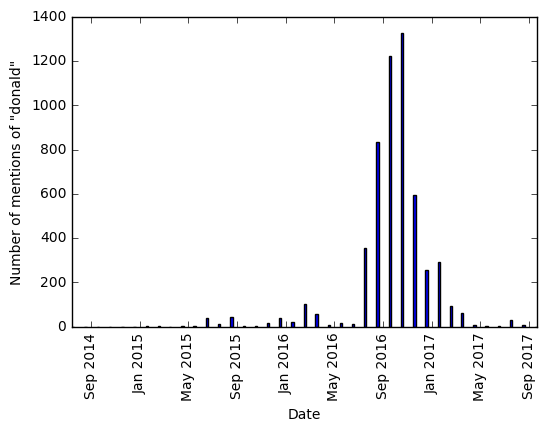

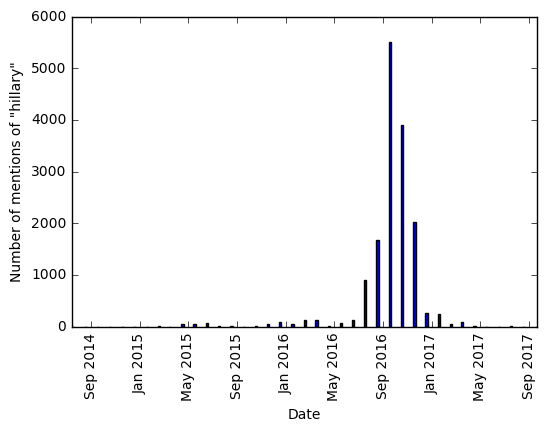

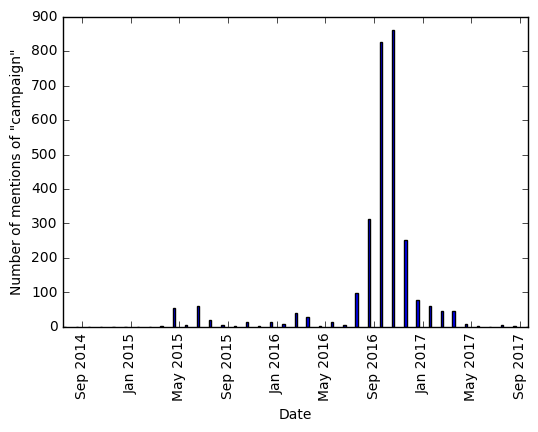

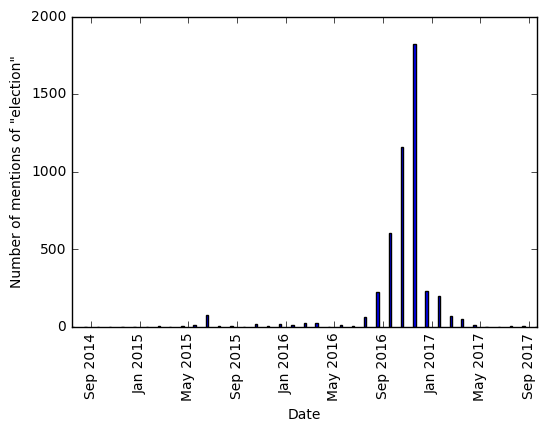

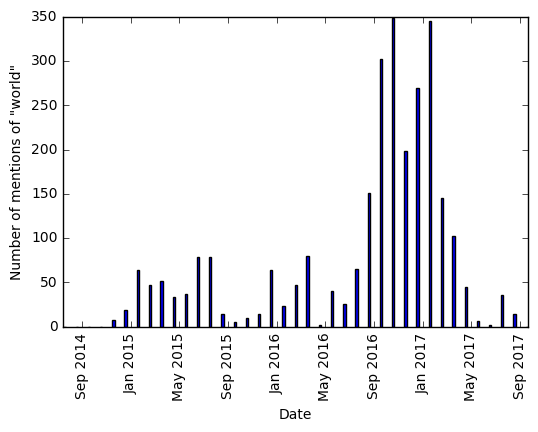

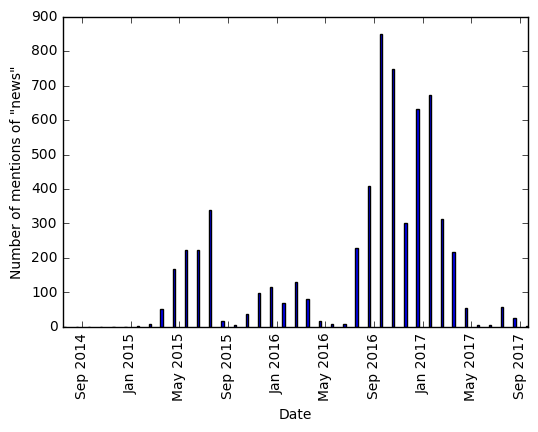

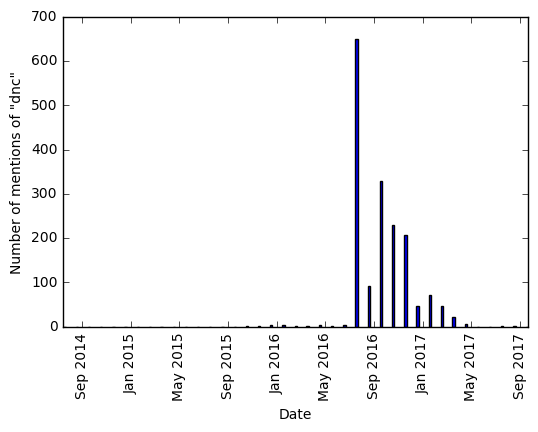

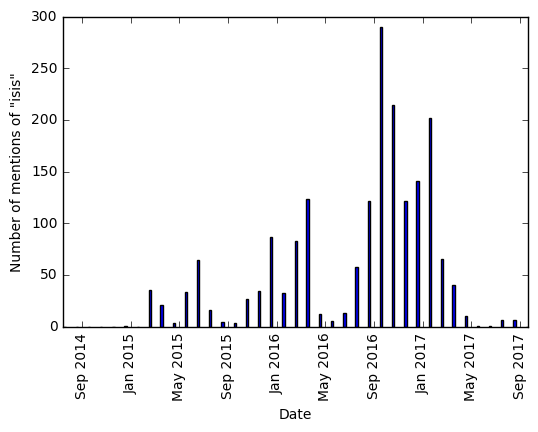

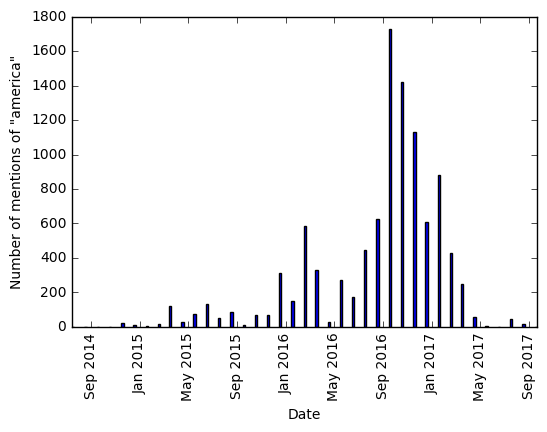

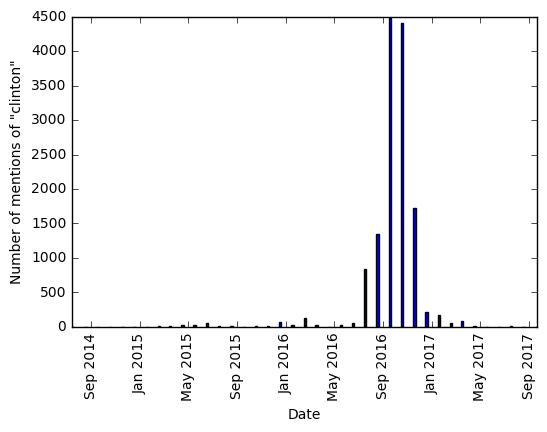

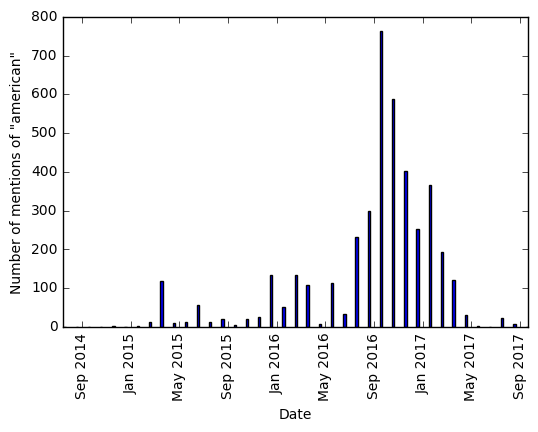

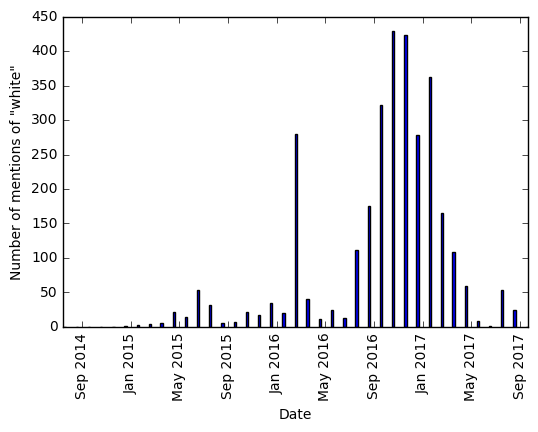

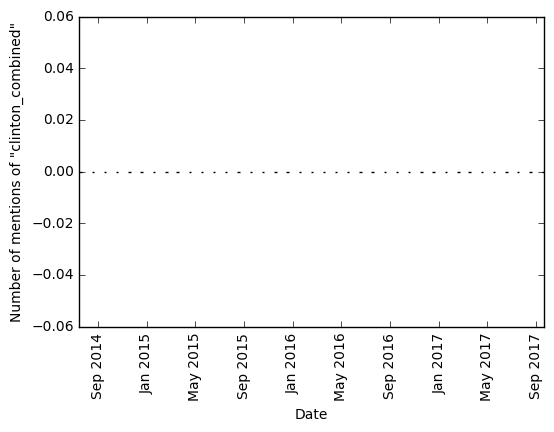

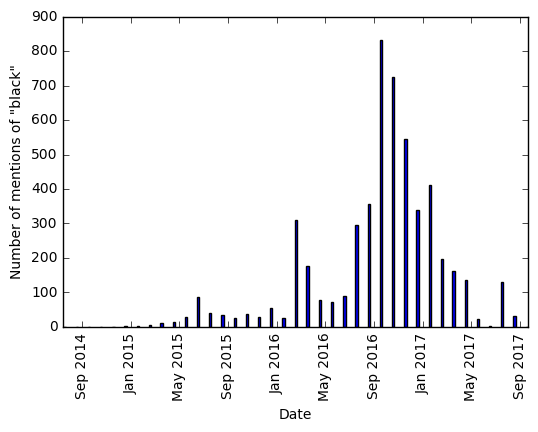

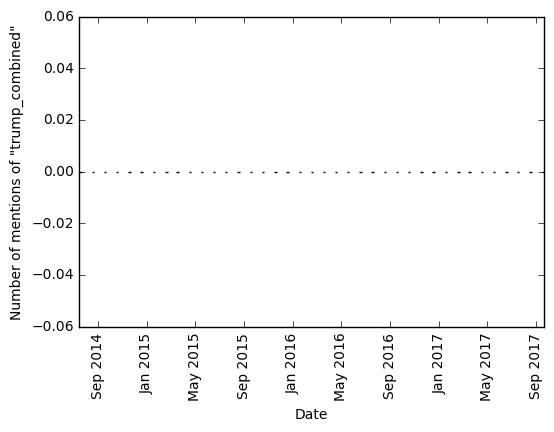

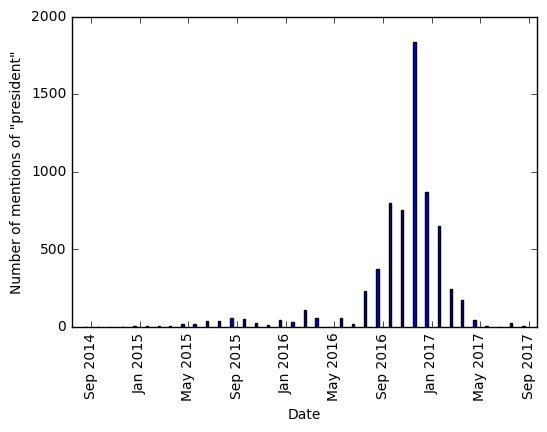

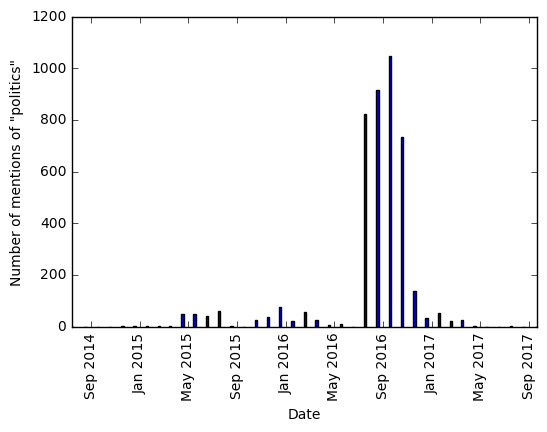

In [59]:
def PlotMentionsByMonth(dates, word):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    if (len(dates) > 0):
        hist = dict()
    
        for date in dates:
            year = date[0].year
            month = date[0].month
            day = 15
            
            if datetime.date(year, month, day) in hist:
                hist[datetime.date(year, month, day)] += date[1]
            else:
                hist[datetime.date(year, month, day)] = date[1]
        
        orderDateCount = sorted(hist.items(), key=lambda x:x[0], reverse=True)
        
        x_val = [x[0] for x in orderDateCount]
        y_val = [x[1] for x in orderDateCount]
        
        plt.bar(x_val, y_val, color='blue', width=6)
        plt.xticks(rotation=90)
        plt.ylabel("Number of mentions of \"" + word + "\"")
        plt.xlabel("Date")
        plt.show()
    
for word in selected.keys():
    PlotMentionsByMonth(GetDates(word), word)

Mean: 0.0162327875778 mode: 0.0 variance: 0.0833759251063
Percent positive: 0.27314814814814814 Percent negative: 0.2222222222222222 Percent Neutral: 0.5046296296296297


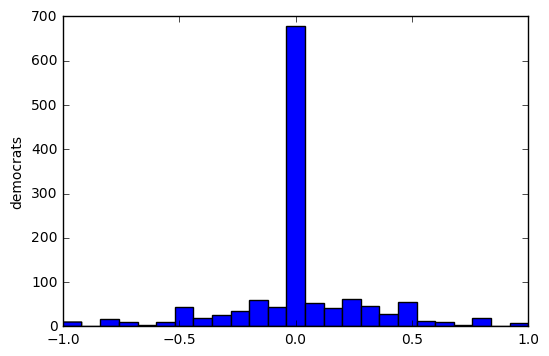

Mean: 0.0647772784397 mode: 0.0 variance: 0.0847486610803
Percent positive: 0.30319148936170215 Percent negative: 0.1677096370463079 Percent Neutral: 0.52909887359199


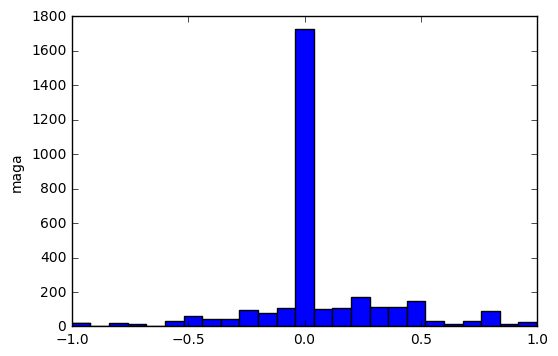

Mean: 0.0414916483157 mode: 0.0 variance: 0.068459540293
Percent positive: 0.28832429346274624 Percent negative: 0.1818441335997716 Percent Neutral: 0.5298315729374822


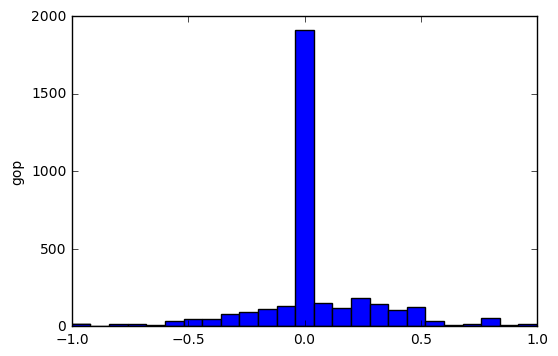

Mean: 0.0237747889127 mode: 0.0 variance: 0.0691838026493
Percent positive: 0.2752788443956848 Percent negative: 0.2057048820625343 Percent Neutral: 0.5190162735417809


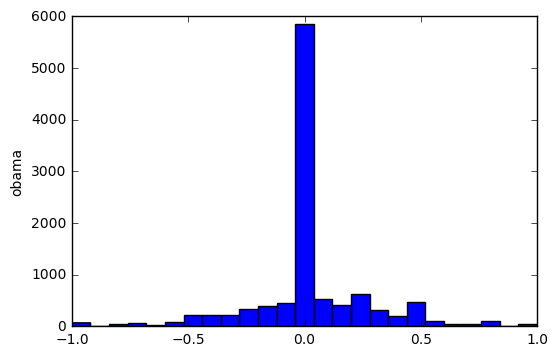

Mean: 0.0462026918081 mode: 0.0 variance: 0.0785199531967
Percent positive: 0.30627263841775426 Percent negative: 0.18794917495544183 Percent Neutral: 0.5057781866268038


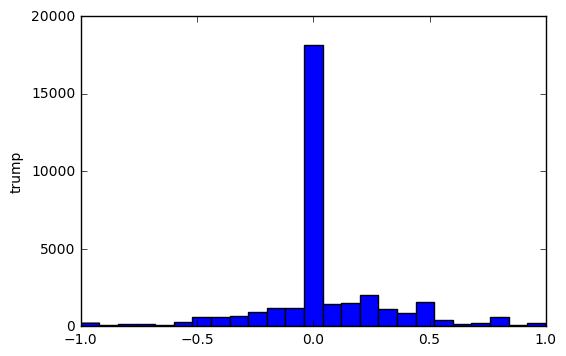

Mean: 0.0313578575808 mode: 0.0 variance: 0.0691473374823
Percent positive: 0.2941666666666667 Percent negative: 0.18125 Percent Neutral: 0.5245833333333333


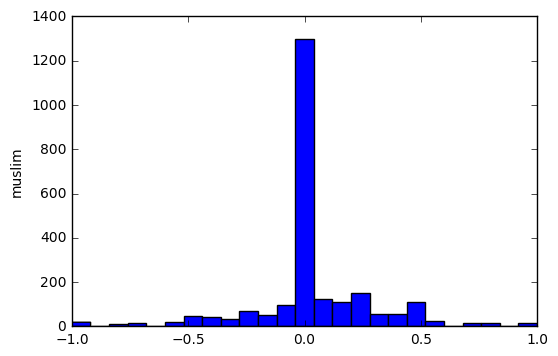

Mean: 0.0473626302421 mode: 0.0 variance: 0.0749881245138
Percent positive: 0.29674945215485754 Percent negative: 0.1672753834915997 Percent Neutral: 0.5359751643535428


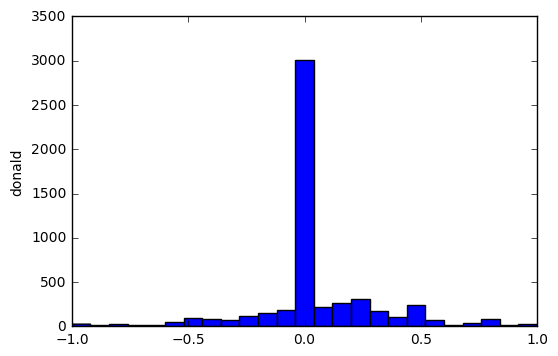

Mean: 0.0181946495265 mode: 0.0 variance: 0.0715293269416
Percent positive: 0.2583802456499488 Percent negative: 0.2100818833162743 Percent Neutral: 0.5315378710337769


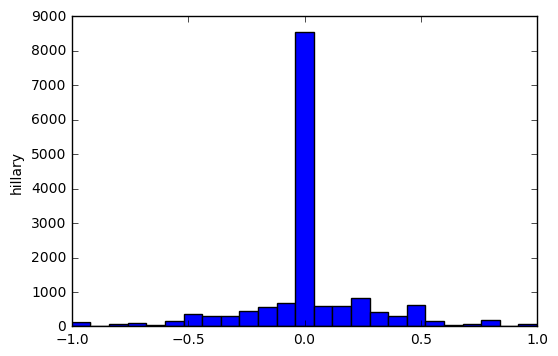

Mean: 0.0330550940661 mode: 0.0 variance: 0.054758801958
Percent positive: 0.26717557251908397 Percent negative: 0.16759195003469812 Percent Neutral: 0.5652324774462179


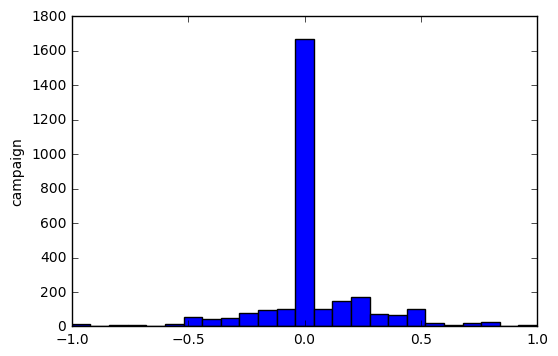

Mean: 0.0425682730667 mode: 0.0 variance: 0.0703557133063
Percent positive: 0.27985395189003437 Percent negative: 0.16709621993127147 Percent Neutral: 0.5530498281786942


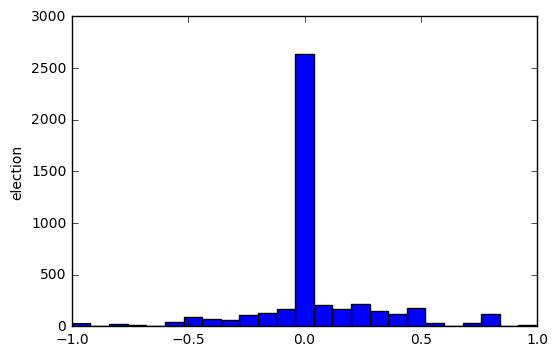

Mean: 0.0642784703951 mode: 0.0 variance: 0.0875227212015
Percent positive: 0.357606344628695 Percent negative: 0.18601297764960345 Percent Neutral: 0.4563806777217015


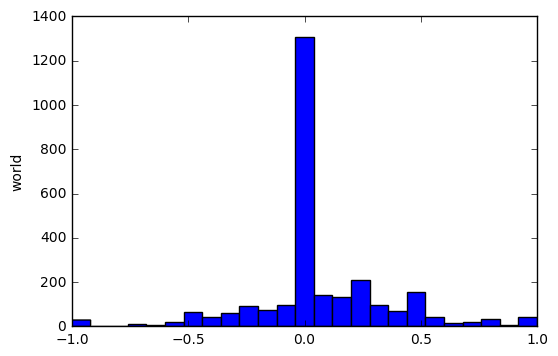

Mean: 0.0162226065161 mode: 0.0 variance: 0.0745852877556
Percent positive: 0.25690021231422505 Percent negative: 0.20921117099461048 Percent Neutral: 0.5338886166911645


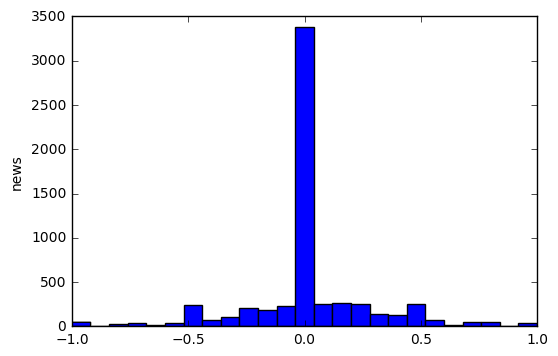

Mean: 0.0188761510899 mode: 0.0 variance: 0.0653184002677
Percent positive: 0.26608695652173914 Percent negative: 0.19826086956521738 Percent Neutral: 0.5356521739130434


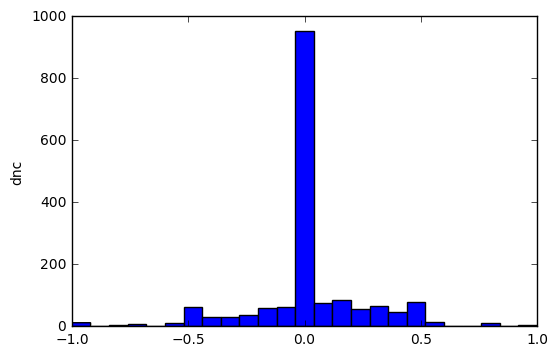

Mean: 0.00423604120936 mode: 0.0 variance: 0.0551196839529
Percent positive: 0.2086864406779661 Percent negative: 0.17584745762711865 Percent Neutral: 0.6154661016949152


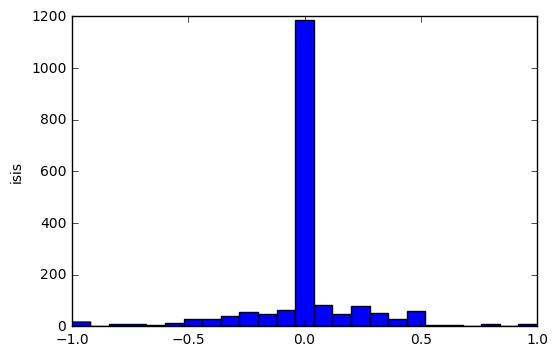

Mean: 0.0599915228917 mode: 0.0 variance: 0.0824033121581
Percent positive: 0.3251032854613417 Percent negative: 0.1857170962030297 Percent Neutral: 0.48917961833562856


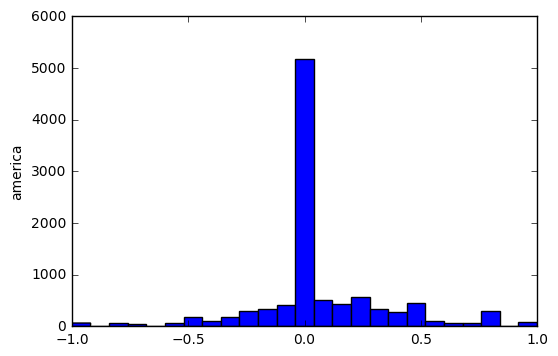

Mean: 0.0253325336214 mode: 0.0 variance: 0.0605288338098
Percent positive: 0.265097755249819 Percent negative: 0.18341781317885592 Percent Neutral: 0.5514844315713251


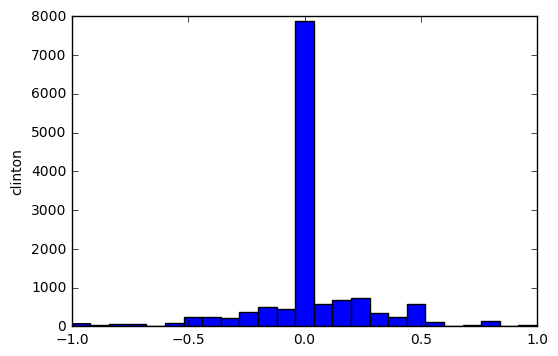

Mean: 0.0312117822433 mode: 0.0 variance: 0.0549513778721
Percent positive: 0.3150784077201447 Percent negative: 0.2180940892641737 Percent Neutral: 0.46682750301568154


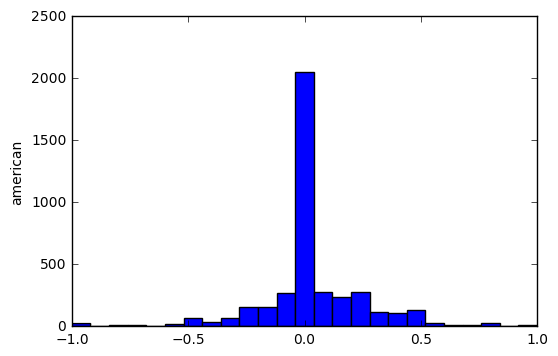

Mean: 0.0100923917304 mode: 0.0 variance: 0.0325231761629
Percent positive: 0.29128074097732354 Percent negative: 0.24624720536569786 Percent Neutral: 0.4624720536569786


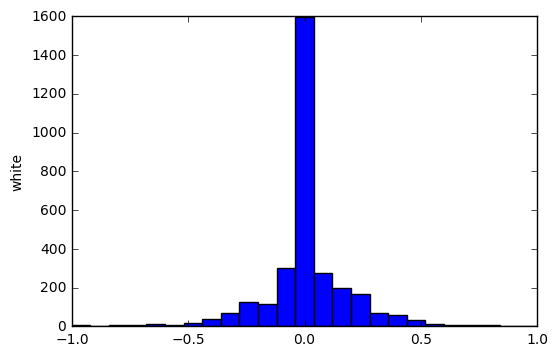

Mean: -0.0288194521194 mode: 0.0 variance: 0.0496884315396
Percent positive: 0.25952470765748775 Percent negative: 0.501886080724255 Percent Neutral: 0.23858921161825727


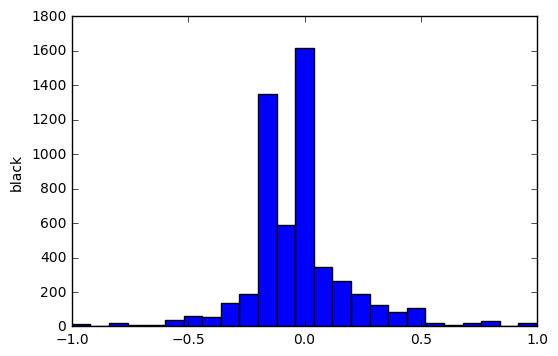

Mean: 0.0657860683833 mode: 0.0 variance: 0.0814192396093
Percent positive: 0.3162354365259495 Percent negative: 0.15494023301558482 Percent Neutral: 0.5288243304584658


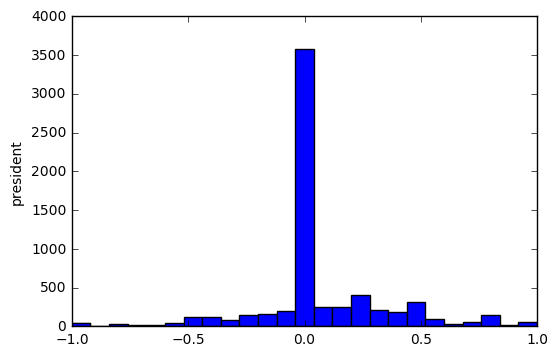

Mean: 0.0328128769628 mode: 0.0 variance: 0.0501696533727
Percent positive: 0.2337935876433419 Percent negative: 0.1376082377720571 Percent Neutral: 0.628598174584601


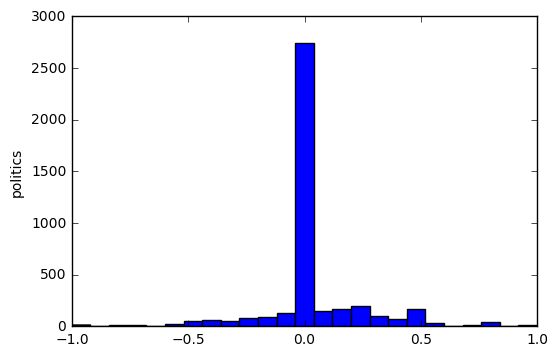

In [60]:
from textblob import TextBlob
from scipy.stats import mode
          
# This block uses Textblob to do a sentiment analysis of each tweet containing a certain word.
# Here, we only look at the number of tweets which Textblob determines to be positive, negative, or neutral,
# ignoring when they were posted

def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(clean_tweet(tweet))
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

# Returns the percentage of positive, negative, and neutral tweets for a given word
def Percentages(sentiments):
    percentPositive = 0
    percentNegative = 0
    percentNeutral = 0
    
    for sentiment in sentiments:
        if sentiment > 0:
            percentPositive += 1
        elif sentiment < 0:
            percentNegative += 1
        else:
            percentNeutral += 1
            
    return percentPositive / len(sentiments), percentNegative / len(sentiments), percentNeutral / len(sentiments)

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        percentPositive, percentNegative, percentNeutral = Percentages(sent)
        print("Mean: " + str(np.mean(sent)) + " mode: " + str(mode(sent)[0][0]) + " variance: " + str(np.var(sent)))
        print("Percent positive: " +str(percentPositive) +
              " Percent negative: " + str(percentNegative) + " Percent Neutral: " + str(percentNeutral))
        plt.hist(sent, bins=25)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentiment(word)

Mean: 0.0106267428453 variance: 0.041560296935


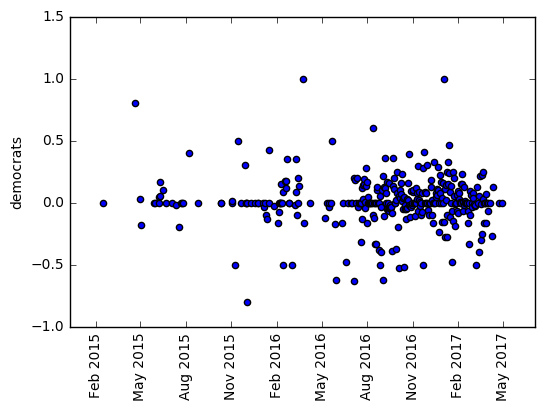

Mean: 0.081472417259 variance: 0.0338026369197


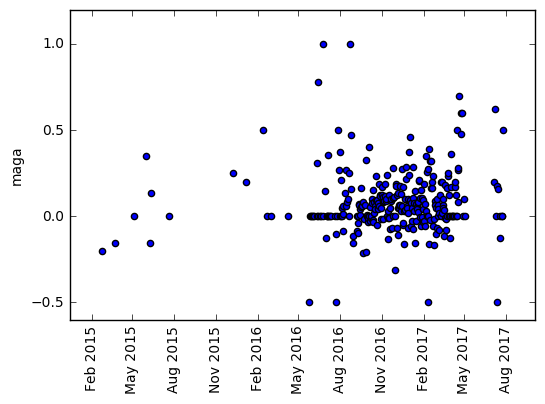

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.857
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0586
Time:                        03:21:34   Log-Likelihood:                 103.11
No. Observations:                 409   AIC:                            -200.2
Df Residuals:                     406   BIC:                            -188.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0959      0.029      3.337      0.0

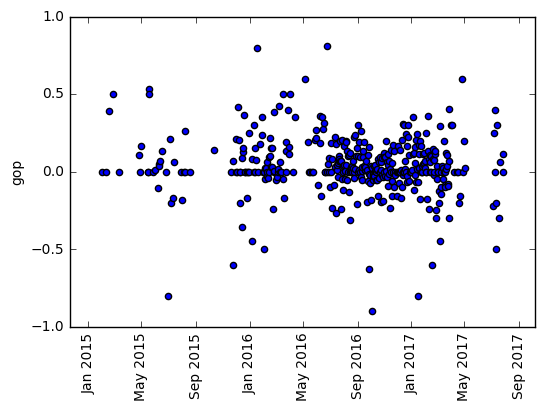

Mean: 0.028363427984 variance: 0.0206379215467


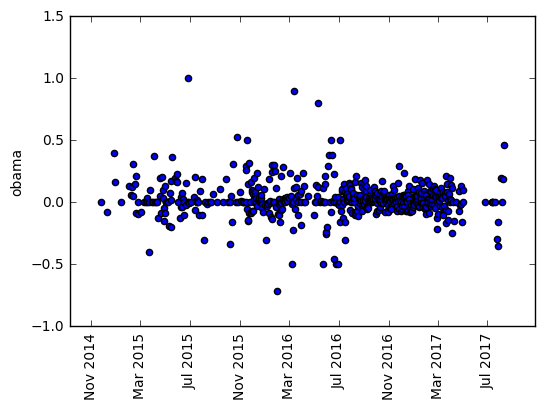

KeyboardInterrupt: 

In [61]:
from statsmodels.regression.linear_model import OLS

# In this block, we plot the average sentiment for each day

# helper function to speed things up in SentimentWithTime below
def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] == (date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) > 0):
        RegressSentiment(ordered_sent)
        
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel(word)
        plt.show()
        
# Attempt to find a linear trend in the sentiment for each day        
def RegressSentiment(ordered_sent):
    if (len(ordered_sent) > 0):
        time0 = ordered_sent[0][0]
    
        # The first column is the intercept, second column is the time, and
        # the third is an indicator for whether it is election season or not
        X = np.ones(shape=(len(ordered_sent), 3))
        for i in range(0, len(ordered_sent)):
            X[i, 1] = (ordered_sent[i][0] - time0).days
            X[i, 2] =  1 if (ordered_sent[i][0] > July1 and ordered_sent[i][0] < December31) else 0
        
        y = np.array([x[1] for x in ordered_sent])
    
        model = OLS(y, X)
        fit = model.fit()
        if (fit.rsquared > 0.01):
            print(fit.summary())

            
for word in selected:
    PlotSentimentWithTime(word)

In [20]:
import ast # this is just use to evaluate the lemmas
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

decisionTree = DecisionTreeClassifier()
vectorizer  = TfidfVectorizer()
randomForest = RandomForestClassifier()
ts_test = []

def DataSets(trainingSet, tweets):
   
    tsTrain = trainingSet[:90000]
    tsTest = trainingSet[~trainingSet.ItemID.isin(tsTrain.ItemID)]
    xTrain = vectorizer.fit_transform(tsTrain.text_lemma.astype('unicode')) 
    xTest = vectorizer.transform(tsTest.text_lemma.astype('unicode')) 
    yTrain,yTest = tsTrain['Sentiment'], tsTest['Sentiment']
    xTweet = vectorizer.transform(tweets.text_lemma.astype('unicode'))
        
    return xTrain, yTrain, xTest, yTest, xTweet

def TrainDecisionTree(xTrain, yTrain, xTest, yTest):
    ## Classifications are under Sentiment: 0=neg and 1=pos
    ## SetimentText==Tweets    
    t0 = time.time()
    decisionTree = decisionTree.fit(xTrain,yTrain)
            
    t1 = time.time()
    testPrediction = decisionTree.predict(xTest)
    t2 = time.time()
    print('Time taken to train '+str(t1-t0))
    print('Time taken to predict '+str(t2-t1))
            
    print(classification_report(yTest, testPrediction))
            
    return decisionTree
        
    
def Tree(xTweet):
                
    predictTweets = decisionTree.predict(xTweet)
    tweetProb = decisionTree.predict_proba(xTweet) # <- not using this, here in case we want it
    return predictTweets


def TrainForest(xTrain,yTrain,xTest,yTest):
    randomForest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
    randomForest.fit(xTrain,yTrain)
    randomForestPrediction = randomForest.predict(xTest)
    accuracy = accuracy_score(yTest,randomForestPrediction)
        
    print(classification_report(yTest, randomForestPrediction))
    
    return randomForest, randomForestPrediction

def Forest(xTweet):
    
    forestPredictTweets = randomForest.predict(xTweet)
    # this function returns an array that has the tweet sentiement in order
    # Can be appended to the original tweet dataframe for further analysis
    return forestPredictTweets

trainingSet = pd.read_csv("training_parsed.csv", index_col=0, encoding='latin-1', header=0)
tweets = pd.read_csv("tweets_parsed.csv", low_memory=False, index_col=0, dtype='object')

xTrain, yTrain, xTest, yTest, xTweet = DataSets(trainingSet, tweets)
randomForest, randomForestPrediction = TrainForest(xTrain, yTrain, xTest, yTest)

             precision    recall  f1-score   support

          0       0.70      0.68      0.69      4001
          1       0.79      0.80      0.80      5988

avg / total       0.75      0.75      0.75      9989



In [73]:
tweets_csv = pd.read_csv("tweets_parsed.csv", low_memory=False, index_col=0, dtype='object')

def sentiment(word):
    tweets = tweets_csv[tweets_csv['text_lemma'].str.contains(word) == True]
    print(tweets.shape)
    
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        tokens = nltk.word_tokenize(tweet)
        print(tweet)
        print(tokens)
        vector = vectorizer.transform(tokens)
        print(vector)
        analysis = Forest(vector)
        print(analysis)
        sentiment.append(analysis)
    
    return sentiment



print(sentiment('fbi'))

(1457, 18)
RT @ott_deb: Now the PC #FBI says St Cloud stabbings are "being investigated as a POTENTIAL act of terrorism". OMG, Obama the PC President…
['RT', '@', 'ott_deb', ':', 'Now', 'the', 'PC', '#', 'FBI', 'says', 'St', 'Cloud', 'stabbings', 'are', '``', 'being', 'investigated', 'as', 'a', 'POTENTIAL', 'act', 'of', 'terrorism', "''", '.', 'OMG', ',', 'Obama', 'the', 'PC', 'President…']
  (0, 78970)	1.0
  (4, 72416)	1.0
  (5, 85136)	1.0
  (6, 74401)	1.0
  (8, 56155)	1.0
  (10, 82819)	1.0
  (11, 49732)	1.0
  (13, 21886)	1.0
  (15, 30644)	1.0
  (17, 23088)	1.0
  (19, 75786)	1.0
  (20, 7421)	1.0
  (21, 72842)	1.0
  (22, 84942)	1.0
  (25, 73102)	1.0
  (27, 72703)	1.0
  (28, 85136)	1.0
  (29, 74401)	1.0
  (30, 76036)	1.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
RT @CLewandowski_: FBI Sources Tell Fox News An "Indictment Is Likely" In Clinton Foundation Case | Video | RealClearPolitics https://t.co/…
['RT', '@', 'CLewandowski_', ':', 'FBI', 'Sources', 'Tell', 'Fox'